### 勾配ブースティング回帰木(勾配ブースティングマシン)

一つ前に決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく。勾配ブースティングのポイントは浅い決定木のような、簡単なモデルを多数組み合わせることにある。回帰にも分類にも使える。
ランダムフォレストに比べ、パラメータ設定の影響を受けやすいが正しく設定されていれば、こちらの方が性能がいい。

デフォルトでは勾配ブースティングに乱数性はないが強力な事前枝刈りが用いられる。
深さ１から５くらいの浅い決定木が用いられることにより、モデルの占めるメモリが低くなり高速になる。

勾配ブースティング回帰木には、事前枝刈りとアンサンブルに用いる決定木の数を設定するパラメータの他に学習率というパラメータがある。学習率を大きくすると個々の決定木が強く補正を行おうとし、モデルは複雑になる。

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.958


学習データが１００％になってるので過剰適合している。深さを制限して事前枝刈りを行うか、学習率を下げるとよい。

深さ１に下げて見る

In [2]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.972


学習率をさげる

In [3]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.965


どちらも訓練データのスコアはさがってるが、テスト精度はあがってる。

In [7]:
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

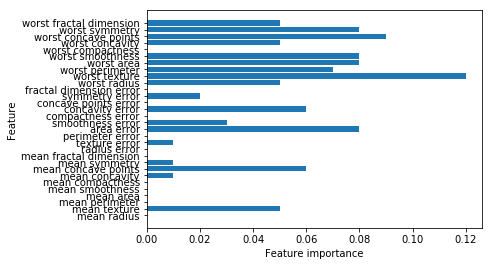

In [9]:
import matplotlib.pyplot as plt

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)
plt.show()

勾配ブースティングではいくつかの特徴量が完全に無視されている。勾配ブースティングとランダムフォレストは同じ様なデータを得意とするので、一般的には頑健なランダムフォレストを先に試す。ランダムフォレストの精度をあげたいときに勾配ブースティングを試す。もっと大きな問題に適応したい場合はxgboostのほうが高速で多くのチューニングが可能。

### 勾配ブースティング回帰木の長所, 欠点, パラメータ

- パラメータ

```
n_estimators: 決定木の数を指定
learning_rate: 誤りの補正度合いを制御する -> 小さいと、複雑なモデルを作るにはより沢山の決定木が必要になる
```

- 利点
    - 強い(教師あり学習の中でもトップクラス) 
- 欠点
    - パラメータのチューニングが大切であること
    - 時間がかかる
    

高次元で疎なデータにはうまく機能しない。